<a href="https://colab.research.google.com/github/QuantumPower4/MetodosComputacionales20231/blob/main/OndasYFluidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [86]:
def formato_grafica(ax, fig, titulo= "", x_label= "", y_label= "", leyenda=False, xlim=[None, None], ylim=[None, None]):

    ax.set_title(titulo)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)

    # Utilizarlo si se necesita alguna rotación en los labels de los ejes
#     ax.set_xticklabels(ax.get_xticks(), rotation = 0)
#     ax.set_yticklabels(ax.get_yticks(), rotation = 0)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    # Grid de la gráfica
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        ax.legend(loc='best', fontsize= 7)

    fig.tight_layout()

In [87]:
def propagacion_error(func,var,inc)->float:
  delta_funcion_cuadrado = 0
  num = len(var)

  for i in range(num):
    delta_funcion_cuadrado += (func.diff(var[i])*inc[i])**2

  delta_funcion=sym.sqrt(delta_funcion_cuadrado)

  return delta_funcion.simplify()

# PRIMERA PARTE

In [89]:
T_ = sym.symbols("T")
propagacion_error(T_**2,[T_],[sym.symbols("sigma_T")])

2*sqrt(T**2*sigma_T**2)

In [90]:
T= np.array([2.5,2.32,2.15,2.03,1.87,1.7])
T_cuadrado = T**2
sigma_T = np.array([0.01]*len(T))
sigma_T_cuadrado = sigma_T*2*T #Propagación de la incertidumbre

In [91]:
T_cuadrado

array([6.25  , 5.3824, 4.6225, 4.1209, 3.4969, 2.89  ])

In [92]:
sigma_T_cuadrado

array([0.05  , 0.0464, 0.043 , 0.0406, 0.0374, 0.034 ])

In [93]:
L = np.array([1.45,1.3,1.15,1,0.85,0.7])
sigma_L = np.array([1/2000]*len(L))

In [94]:
sigma_L

array([0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005])

In [125]:
T_teorico = 2*np.pi*np.sqrt(L/9.77)

In [130]:
L_ = sym.Symbol("L")
error = propagacion_error(2*sym.pi*sym.sqrt(L_/9.77),[L_],[sym.Symbol("sigma_L")])
error_ = sym.lambdify([L_,sym.Symbol("sigma_L")],error)

In [133]:
error

0.319928344075492*pi*sqrt(sigma_L**2/L)

In [131]:
sigma_T_teorico = error_(L,sigma_L)

In [132]:
T_teorico, sigma_T_teorico

(array([2.4205641 , 2.29194537, 2.15566617, 2.01016907, 1.85328431,
        1.68182811]),
 array([0.00041734, 0.00044076, 0.00046862, 0.00050254, 0.00054508,
        0.00060065]))

In [88]:
T_teo = sym.symbols("T_teo")
T_exp = sym.symbols("T_exp")
sigma_T_teo = sym.symbols("sigma_T_teo")
sigma_T_exp = sym.symbols("sigma_T_exp")

propagacion_error(T_teo-T_exp,[T_teo,T_exp],[sigma_T_teo,sigma_T_exp])

sqrt(sigma_T_exp**2 + sigma_T_teo**2)

In [138]:
delta_T = abs(T_teorico-T)
sigma_delta_T = np.sqrt(sigma_T**2+sigma_T_teorico**2)

In [139]:
delta_T,sigma_delta_T

(array([0.0794359 , 0.02805463, 0.00566617, 0.01983093, 0.01671569,
        0.01817189]),
 array([0.0100087 , 0.01000971, 0.01001097, 0.01001262, 0.01001484,
        0.01001802]))

In [95]:
result1 = scipy.stats.linregress(L,T_cuadrado)

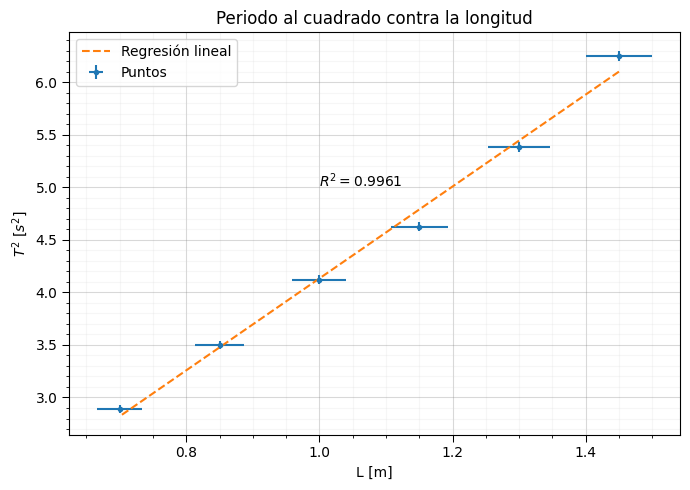

In [96]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.errorbar(L,T_cuadrado,yerr=sigma_T_cuadrado,xerr=sigma_T_cuadrado,fmt=".",label="Puntos")
ax.plot(L,np.poly1d([result1.slope, result1.intercept])(L),linestyle="--",label="Regresión lineal")
plt.legend()
formato_grafica(ax,fig,"Periodo al cuadrado contra la longitud","L [m]","$T^2$ [$s^2$]")
plt.text(1,5,"$R^2 = {0}$".format(np.round(result1.rvalue,4)))
plt.savefig("./regresion.png")

In [97]:
[result1.slope, result1.stderr]

[4.372971428571429, 0.19378201372556905]

In [98]:
[result1.intercept,result1.intercept_stderr]

[-0.240494285714286, 0.2141488531960167]

In [99]:
result1.rvalue

0.9960955996158779

In [100]:
m = sym.symbols("m")
propagacion_error(4*sym.pi**2/m,[m],[sym.symbols("sigma_m")])

4*pi**2*sqrt(sigma_m**2/m**4)

In [101]:
g = (4*np.pi**2)/result1.slope
incert_g = (4*np.pi**2)*(result1.stderr/result1.slope**2)
g, incert_g

(9.027824272168711, 0.40005520173108705)

# SEGUNDA PARTE

In [102]:
L2 = np.array([1.45,1.3,1.15,1,0.85,0.7])
gamma = np.array([0.058,0.079,0.070,0.053,0.0492,0.046])
omega = np.array([2.5040,2.651,2.835,3.047,3.2558,3.631])
sigma_gamma = np.array([0.002,0.004,0.001,0.002,0.0006,0.002])
sigma_gamma = np.array([0.0009,0.002,0.001,0.001,0.0007,0.001])
sigma_L2 = sigma_L

In [103]:
M = 35.2 * (1/1000)
sigma_M = 0.1 * (1/1000)
R = 7.55986 * (1/100)
sigma_R = (1/2000)/(2*np.pi) # P = 2piR

In [104]:
I = (2/5)*M*R**2 + M*L2**2

In [105]:
M_,R_,L_ = sym.symbols("M,R,L")
sigmaM,sigmaR,sigmaL = sym.symbols("sigma_M,sigma_R,sigma_L")
inc_prop = propagacion_error((2/5)*M_*R_**2 + M_*L_**2,[M_,R_,L_],[sigmaM,sigmaR,sigmaL])
inc_new = sym.lambdify([M_,R_,L_,sigmaM,sigmaR,sigmaL],inc_prop)
sigma_I = inc_new(M,R,L2,sigma_M,sigma_R,sigma_L2)

In [106]:
inc_prop

2*sqrt(L**2*M**2*sigma_L**2 + 0.16*M**2*R**2*sigma_R**2 + sigma_M**2*(L**2 + 0.4*R**2)**2/4)

In [107]:
I, sigma_I

(array([0.07408847, 0.05956847, 0.04663247, 0.03528047, 0.02551247,
        0.01732847]),
 array([2.16578747e-04, 1.75306381e-04, 1.38525233e-04, 1.06230138e-04,
        7.84116281e-05, 5.50510122e-05]))

In [108]:
omega_0 = np.sqrt(M*9.77*L2/I)

In [109]:
M_,L_,I_,g_ = sym.symbols("M,L,I,g")
sigmaM,sigmaL,sigmaI,sigmag = sym.symbols("sigma_M,sigma_L,sigma_I,sigma_g")
inc_prop = propagacion_error(sym.sqrt(M_*g_*L_/I_),[M_,L_,I_,g_],[sigmaM,sigmaL,sigmaI,sigmag])
inc_new = sym.lambdify([M_,L_,I_,g_,sigmaM,sigmaL,sigmaI,sigmag],inc_prop)
sigma_omega0 = inc_new(M,L2,I,9.77,sigma_M,sigma_L2,sigma_I,0)

In [110]:
inc_prop

sqrt((L*M*sigma_g**2/g + L*g*sigma_M**2/M + M*g*sigma_L**2/L + L*M*g*sigma_I**2/I**2)/I)/2

In [111]:
omega_0,sigma_omega0

(array([2.59434246, 2.7395679 , 2.91221428, 3.12213327, 3.38494666,
        3.7272415 ]),
 array([0.00530653, 0.00562773, 0.00601852, 0.00650929, 0.00715317,
        0.00805329]))

In [112]:
b = gamma*M
gamma_,M_ = sym.symbols("gamma,M")
sigmagamma,sigmaM = sym.symbols("sigma_gamma,sigma_M")
propagacion_error(gamma_*M_,[gamma_,M_],[sigmagamma,sigmaM])

sqrt(M**2*sigma_gamma**2 + gamma**2*sigma_M**2)

In [113]:
sigma_b = np.sqrt(M**2*sigma_gamma**2+gamma**2*sigma_M**2)

In [114]:
b,sigma_b

(array([0.0020416 , 0.0027808 , 0.002464  , 0.0018656 , 0.00173184,
        0.0016192 ]),
 array([3.22065583e-05, 7.08418662e-05, 3.58892742e-05, 3.55967695e-05,
        2.51264005e-05, 3.54992958e-05]))

In [115]:
omega_teo = np.sqrt(omega_0**2 - gamma**2/4)
omega_0_ = sym.Symbol("omega_0")
sigma_omega_0_ = sym.Symbol("sigma_omega_0")
inc_prop = propagacion_error(sym.sqrt(omega_0_**2-gamma_**2/4),[omega_0_,gamma_],[sigma_omega_0_,sigmagamma])
inc_new = sym.lambdify([omega_0_,gamma_,sigma_omega_0_,sigmagamma],inc_prop)
sigma_omega_teo = inc_new(omega_0,gamma,sigma_omega0,sigma_gamma)

In [116]:
inc_prop

sqrt((-gamma**2*sigma_gamma**2 - 16*omega_0**2*sigma_omega_0**2)/(gamma**2 - 4*omega_0**2))/2

In [117]:
omega_teo, sigma_omega_teo

(array([2.59418037, 2.73928313, 2.91200395, 3.1220208 , 3.38485727,
        3.72717054]),
 array([0.00530686, 0.00562833, 0.00601896, 0.00650953, 0.00715336,
        0.00805344]))

In [118]:
omega_0, sigma_omega0

(array([2.59434246, 2.7395679 , 2.91221428, 3.12213327, 3.38494666,
        3.7272415 ]),
 array([0.00530653, 0.00562773, 0.00601852, 0.00650929, 0.00715317,
        0.00805329]))

Datos adicionales (periodo)

In [119]:
T_amort = 2*np.pi*np.sqrt(I/(M*9.77*L))
I_ = sym.Symbol("I")
sigma_I_ = sym.Symbol("sigma_I")
inc_prop = propagacion_error(2*sym.pi*sym.sqrt(I_/(M_*9.77*L_)),[I_,M_,L_],[sigma_I_,sigmaM,sigmaL])
inc_new = sym.lambdify([I_,M_,L_,sigma_I_,sigmaM,sigmaL],inc_prop)
sigma_T_amort = inc_new(I,M,L,sigma_I,sigma_M,sigma_L)

T_amort,sigma_T_amort

(array([2.42187969, 2.29349501, 2.1575285 , 2.01246544, 1.85621398,
        1.68574677]),
 array([0.00495377, 0.00471139, 0.00445885, 0.00419576, 0.00392261,
        0.00364232]))

In [120]:
inc_prop

0.319928344075492*pi*sqrt((I*sigma_M**2/M**2 + I*sigma_L**2/L**2 + sigma_I**2/I)/(L*M))